In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')
print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.7.2


In [2]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [4]:
df_can.shape

(195, 39)

#### For plotting the data easily, let's set the country name as index

In [5]:
df_can.set_index('Country', inplace = True)

In [6]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [7]:
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


##### Creating a list of years from 1980 - 2013

In [8]:
years = list(map(str, range(1980, 2014)))

# PIE CHARTS

#####
Using Pie chart to explore the proportion(percentage) of new immigrants grouped by continents for the ntire time period from 1980 to 2013.

#### Step 1: Gather data
Use the groupby method to summarize the immigration data by Continent.

In [9]:
# group countries by continents and apply sum() function
df_continents = df_can.groupby('Continent', axis=0).sum()

print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,Northern AfricaMiddle AfricaWestern AfricaSout...,Developing regionsDeveloping regionsDeveloping...,3951,4363,3819,2671,2639,2650,3782,7494,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,Southern AsiaWestern AsiaWestern AsiaWestern A...,Developing regionsDeveloping regionsDeveloping...,31025,34314,30214,24696,27274,23850,28739,43203,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,Southern EuropeSouthern EuropeWestern EuropeEa...,Developed regionsDeveloped regionsDeveloped re...,39760,44802,42720,24638,22287,20844,24370,46698,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,CaribbeanSouth AmericaCaribbeanCaribbeanCentra...,Developing regionsDeveloping regionsDeveloping...,13081,15215,16769,15427,13678,15171,21179,28471,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,Northern AmericaNorthern America,Developed regionsDeveloped regions,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


#### Step 2: Plot the data

kind = 'pie'

The following are additional parameters:

autopct - is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be fmt%pct

startangle - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.

shadow - Draws a shadow beneath the pie ( gives a 3D feel)

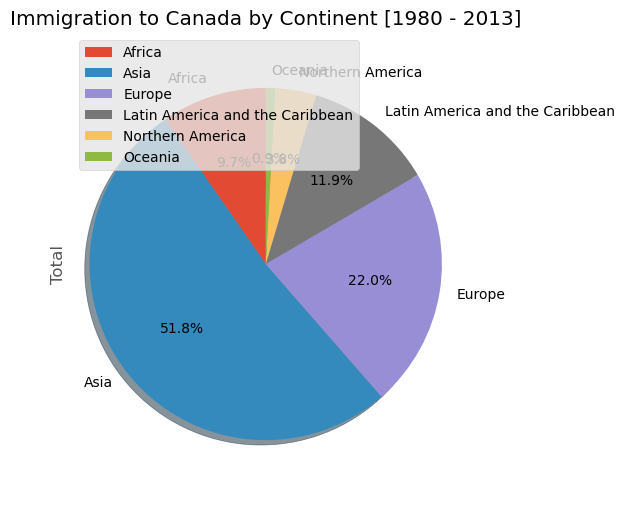

In [10]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5,6),
                            autopct = '%1.1f%%', #adds in percentages
                            startangle = 90,
                            shadow = True,
                           )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # sets the pie chart to look like a circle.
plt.legend(labels=df_continents.index, loc= 'upper left')

plt.show()

###### 
The above visual is not very clear. A few modification to improve the visuals:

Remove the text labels on the pie chart by passing in 'legend' and add it as a deperate legend using plt.lengend()

Push out the percentages to sit just outside the pie chart by passing the 'pctdistance' parameter.

Pass in a custom set of colors for continents by passing in 'colors' parameter.

Explode the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Caribbean) by passing in 'explode' parameter.

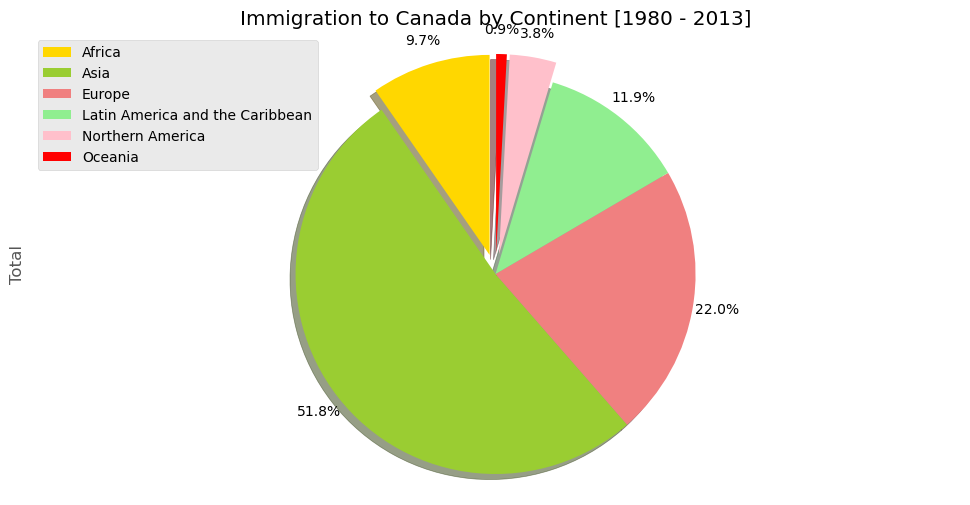

In [11]:
colors_list = ['gold', 'yellowgreen', 'lightcoral','lightgreen', 'pink', 'red']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(12,6),
                            autopct = '%1.1f%%', #adds in percentages
                            startangle = 90,
                            shadow = True,
                            labels = None, # Turns off labels on pie chart
                            pctdistance = 1.12,  # the ratop betweem the center of each pie slice and the start of the text generated by autopct
                            colors = colors_list,
                            explode = explode_list
                           )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # sets the pie chart to look like a circle.
plt.legend(labels=df_continents.index, loc= 'upper left')

plt.show()

##### Using a pie chart to explore the proportion(percentage) of new immigrants grouped by continents in the year 2013

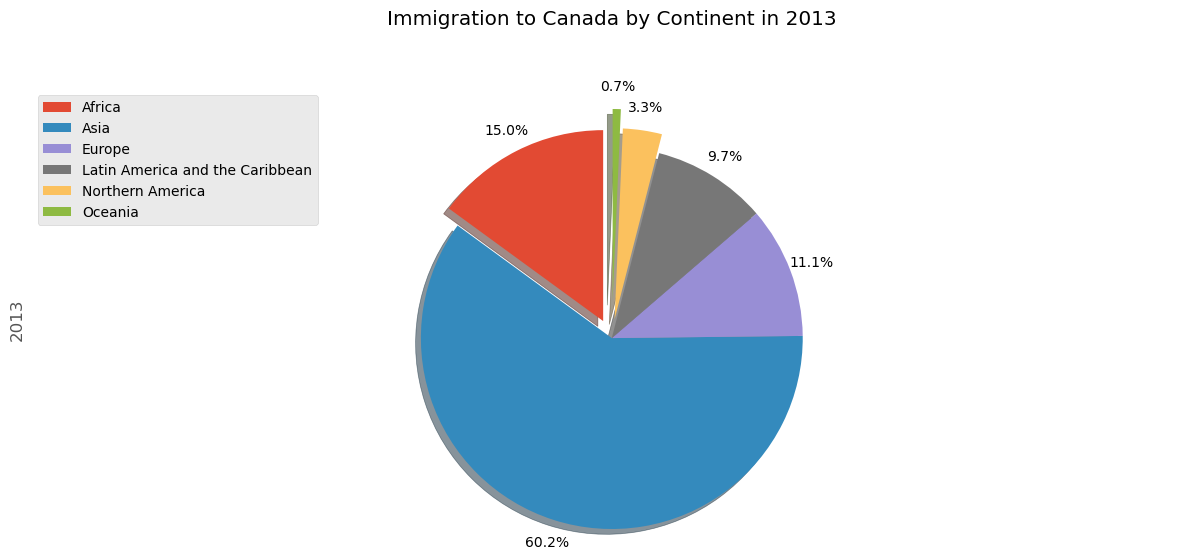

In [12]:

explode_list = [0.1, 0, 0, 0, 0.1, 0.2]
df_continents['2013'].plot(kind = 'pie',
                           figsize = (15, 6),
                           autopct = '%1.1f%%',
                           startangle = 90,
                           shadow = True,
                           labels = None,
                           pctdistance = 1.12,
                           explode = explode_list
                          )
plt.title('Immigration to Canada by Continent in 2013', y =1.12)
plt.axis('equal')
plt.legend(labels=df_continents.index, loc = 'upper left')

plt.show()

# BOX PLOTS

#### Plotting a box plot for the Japanese immigrants between 1980 -2013

Step 1: Get the subset of the dataset

In [13]:
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


###### 
Step 2: Plot by passing in 'kind = box'

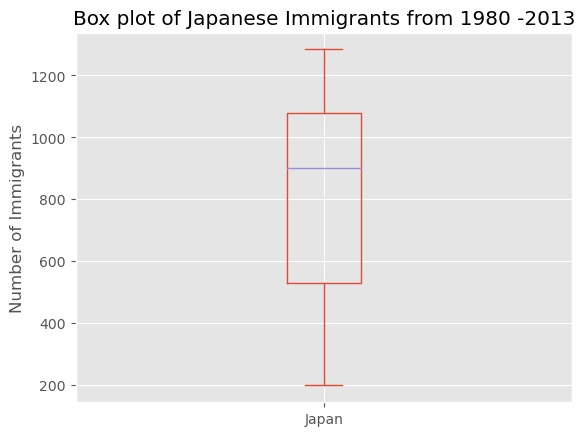

In [14]:
df_japan.plot(kind = 'box')

plt.title('Box plot of Japanese Immigrants from 1980 -2013')
plt.ylabel('Number of Immigrants')

plt.show()

###### 
Viewing the actual numbers by calling the 'describe()' method on the dataframe:

In [15]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


#### Let's Compare the distribution of the number of new immigrants from India and China for the period 1980 -2013

Step 1: Get the dataset for China and India and call the dataframe df_CI

In [16]:
df_CI = df_can.loc[['China', 'India'], years].transpose()

In [17]:
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [18]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


###### 
Step 2: Plot data:

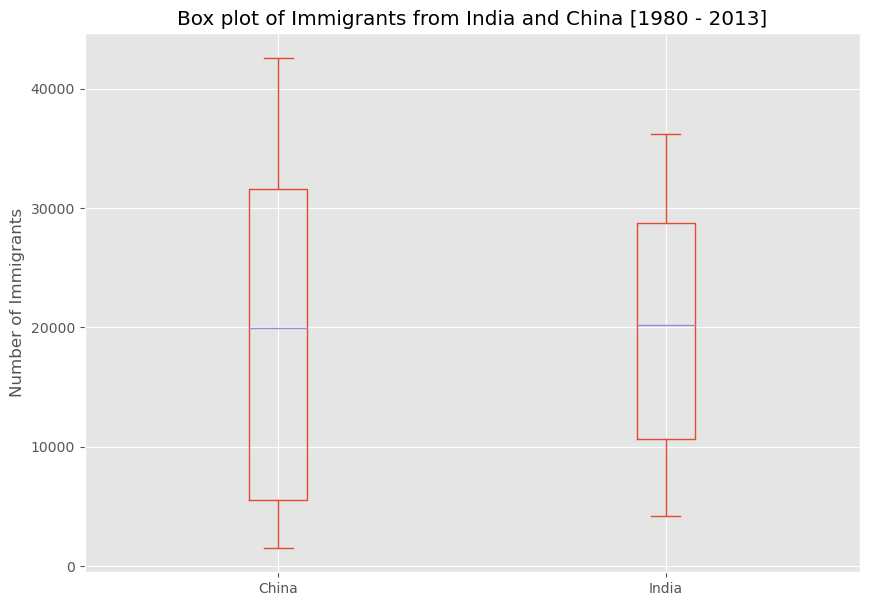

In [19]:
df_CI.plot(kind = 'box', figsize = (10, 7))

plt.title('Box plot of Immigrants from India and China [1980 - 2013]')
plt.ylabel('Number of Immigrants')

plt.show()

###### 
To create horizontal box plots, pass the 'vert' parameter in the plot function and assign it to False:

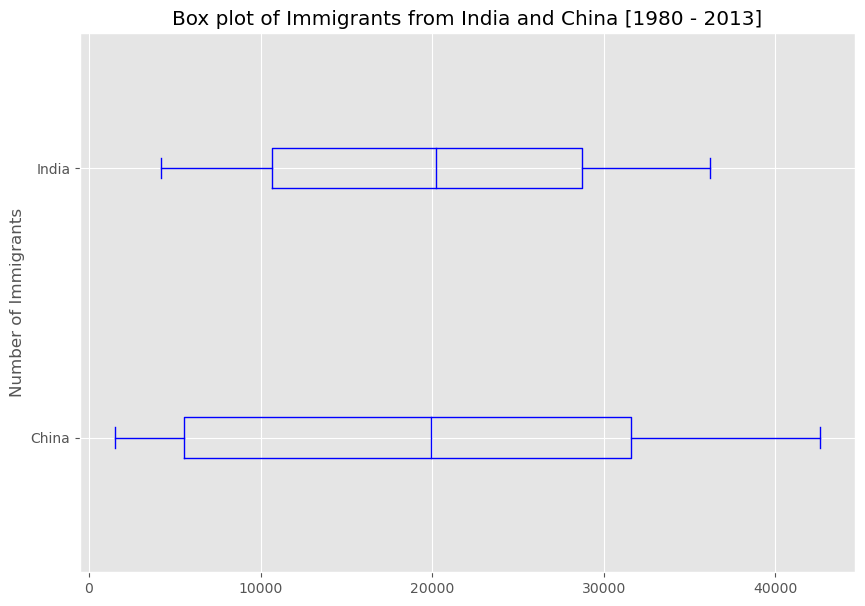

In [20]:
df_CI.plot(kind = 'box', figsize = (10, 7),
          color = 'blue',
          vert = False)

plt.title('Box plot of Immigrants from India and China [1980 - 2013]')
plt.ylabel('Number of Immigrants')

plt.show()

#### Subplots

To perform a side by side comparison of the box plot with the line plot of China and India's immigration,
create a `figure` (overall canvas) and divide it into `subplots`, each containing a plot.
With subplots, the artist layer is usually used instead of the scripting layer.

###### Syntax:
``` Python 
fig = plt.figure()   # create figure
ax = fig.add_subplot(nrows, ncols,
                     plot_number) # create subplots
```
###### Where:

- `nrows` and `ncols` are used to notionally split the figure into (`nrows` * `ncols`) sub-axes

- `plot-number` is used to identify the particular subplot that this function is to create within the notional grid.

- `plot-number` starts at 1, increments across rowss first and has a maximum iof nrows * ncols.

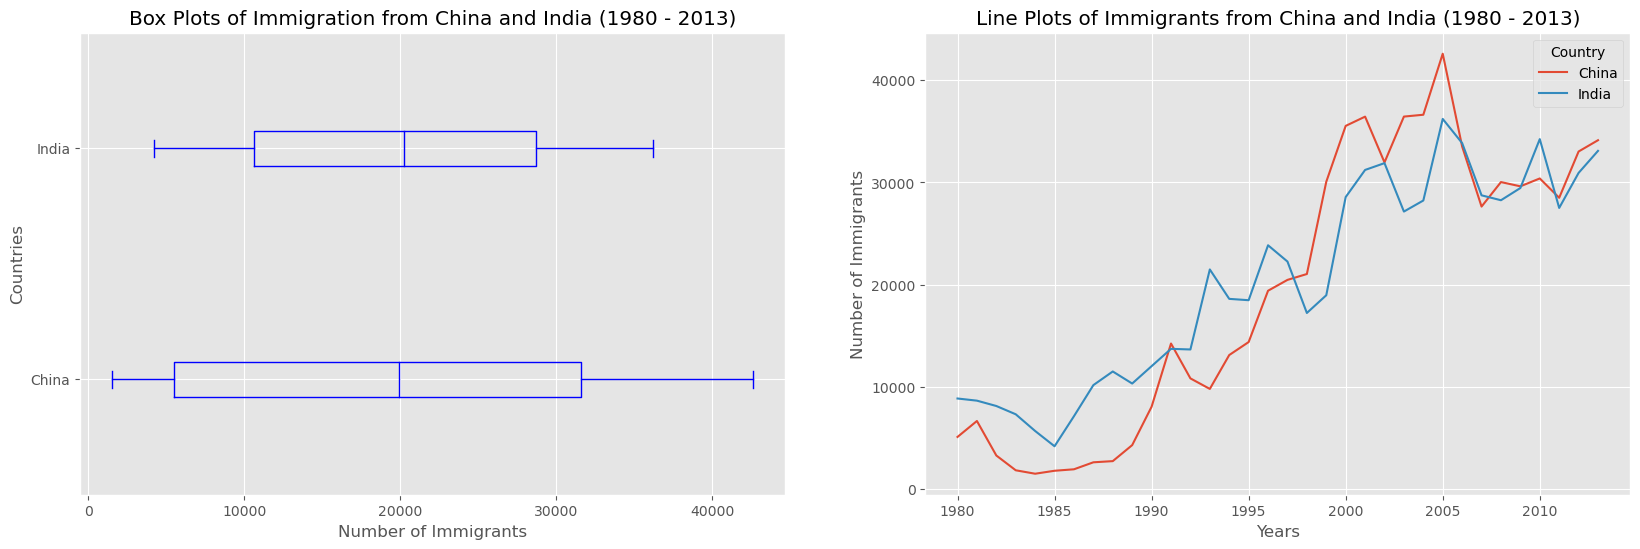

In [21]:
fig = plt.figure()   # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

# Subplot 1: Box plot
df_CI.plot(kind = 'box', color = 'blue', vert = False, figsize =(20, 6), ax = ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigration from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind = 'line', figsize = (20, 6), ax = ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

#### Tip regarding subplot converntion

In the case when `nrows`, `ncols`, and `plot_number` are all less than 10, a convenience exists such that a 3-digit number can be given instead, where the hundreds represent `nrows`, the tens represent `ncol` and the units represent `plot_number`.

```Python
subplot(211) == subplot(2, 1, 1)
```
The above code produces a subaxes in a figure which represents the top plot(i.e the first) in a 2 rows by 1 column notional grid (no grid actually exists, but conceptually this is how the returned subplot has been positioned)

#### Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades `1980s`, `1990s` and `2000s`

###### 
Step 1: Get the dataset.

Get the top 15 countries based on total immigrant population and name the dataframe df_top15

In [22]:
df_top15 = df_can.sort_values(['Total'], ascending = False, axis =0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


###### 
Step 2: Create a new dataframe which contains the aggregate for each decade

1. Create a list of all years in decades 80's, 90's, and 00's
2. Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
3. Merge the three series into a new data frame. Call the dataframe new_df.

In [23]:
# create a list of all years in decades 80s, 90s and 00s
years_80s = list(map(str, range(1980, 1990)))
years_90s = list(map(str, range(1990, 2000)))
years_00s =list(map(str, range(2000, 2014 )))

# Slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis =1)
df_90s = df_top15.loc[:, years_90s].sum(axis =1)
df_00s = df_top15.loc[:, years_00s].sum(axis =1)

# merge the three series into a new dataframe
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s': df_00s})

In [24]:
new_df.head()


,1980s,1990s,2000s
Country,,,
India,82154,180395,429355
China,32003,161528,466431
United Kingdom of Great Britain and Northern Ireland,179171,261966,110363
Philippines,60764,138482,312145
Pakistan,10591,65302,165707


In [25]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,138333.266667
std,44190.676455,68237.560246,145288.871956
min,7613.000000,30028.000000,16775.000000
25%,16698.000000,39259.000000,46754.500000
50%,30638.000000,56915.000000,88133.000000
75%,59183.000000,104451.500000,138035.000000
max,179171.000000,261966.000000,466431.000000


###### 
Step 3: Plot the box plots

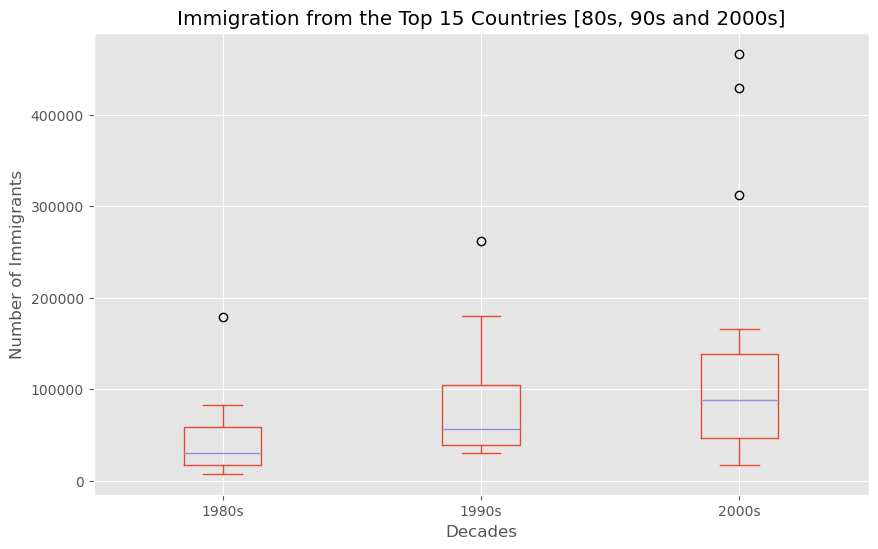

In [26]:
new_df.plot(kind = 'box',
           figsize =(10,6))

plt.title('Immigration from the Top 15 Countries [80s, 90s and 2000s]')
plt.xlabel('Decades')
plt.ylabel('Number of Immigrants')

plt.show()

###### 
Note how the box plot differs from the summary table created. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:<br>

*   larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
*   smaller than Q1 by at least 1.5 times the IQR.

Let's look at decade 2000s as an example: <br>

*   Q1 (25%) = 36,101.5 <br>
*   Q3 (75%) = 105,505.5 <br>
*   IQR = Q3 - Q1 = 69,404 <br>

Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 105,505.5 + (1.5 \* 69,404) <br>
Outlier > 209,611.5


In [27]:
# let's check how many entries fall above the outlier threshold 
new_df = new_df.reset_index()
new_df[new_df['2000s']> 209611.5]

,Country,1980s,1990s,2000s
0,India,82154,180395,429355
1,China,32003,161528,466431
3,Philippines,60764,138482,312145


###### 
China and India are both considered as outliers since their population for the decade exceeds 209,611.5


# SCATTER PLOTS

##### Using a `scatter plot` to visualize the trend of total immigration to Canada (all countries combined) for the years 1980 - 2013.

Step 1: Get the dataset

Since we are expecting to use the relationship between `years` and `total population`, we will convert `years` to `int` type.

In [28]:
# Using the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

df_tot.index = map(int, df_tot.index) # changes the years to type int (useful for regression later on)

df_tot.reset_index(inplace = True) # reset the index to put in back in as a column in the df_tot dataframe

df_tot.columns = ['year', 'total'] # rename columns

df_tot.head()


,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


###### 
Step 2: Plot the data

Create a `scatter` plot set by passing in `kind = 'scatter'` as plot argument. Then pass in `x` and `y` keywords to specify the columns that go on the x-axis and the y-axis. 

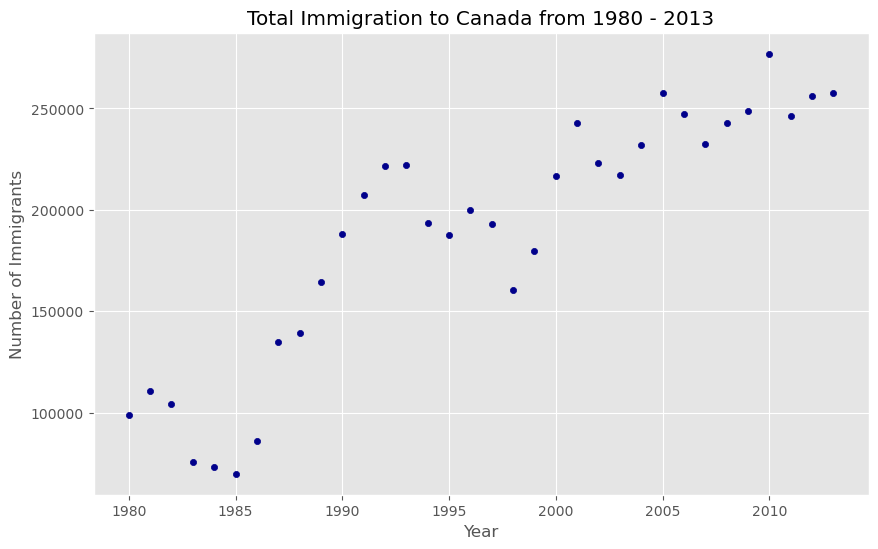

In [29]:
df_tot.plot(kind = 'scatter',
            x = 'year', y = 'total',
            figsize = (10,6), color = 'darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

##### Plot a linear line of best fit, and use it to predict the number of immigrants in 2015:

Step 1: Get the equation of line of best fit.

Use Numpy's `polyfit()` method by passing in the following:
- `x`: x-coordinates of the data
- `y`: y-coordinates of the data
- `deg`: Degree of fitting polynomial. 1=linear, 2=quadratic, and so on

In [30]:
x = df_tot['year']
y = df_tot['total']
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

###### 
The output is an array with the polynomial coefficients, highest powers first. Since we are plotting a linear regression `y=a * x + b`, our output has 2 elements `[ 5.56709228e+03, -1.09261952e+07]` with the slope in position 0 and intercept in position 1.

######
Step 2: PLot the regression line on the `scatter plot`

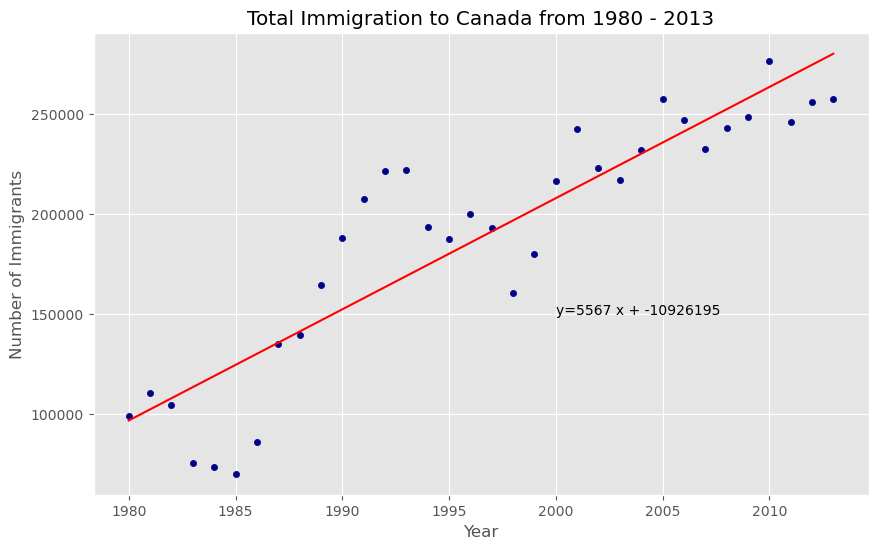

'No. Immigrants = 5567 * Year + -10926195'

In [31]:
df_tot.plot(kind='scatter', x='year', y = 'total',
            figsize = (10, 6), color = 'darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# Plot the line of best fit
plt.plot(x, fit[0] * x + fit[1], color = 'red')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1])

###### 
Using the equation of line of best fit, we can estimate the number of immigrants in 2015:

```Python
No. Immigrants = 5567 * Year - 10926195
No. Immigrants = 5567 * 2015 - 10926195
NO. Immigrants = 291,310
```
When compared to the actual from Citizenship and Immigration Canada's (CIC) 201 Annual Report, we see that Canada accepted 271,845 immigrants in 2015. Our estimated value of 291,310 is within 7% of the actual number, which is pretty good considering our original data came from the United Nations (and might differ slightly from CIC data).

As a side note, we can observe that immigration took a dip around 1993 -1997. Further analysis into the topic revealed that in 1993 Canada introduced Bill C-86 which introudced revisions of the refugee determination system, mostly restrictive. Further amendments to the Immigration Regulations cancelled the sponsorship reuired for 'assisted relatives' and reduced the points awarded to them, making it more difficult for family members (other than nuclear family) to immigrate to Canada. These restrictive measures had a direct impact on the immigration numbers for the next several years.

#### Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013

Step 1: Get the data:

1. Create a dataframe that consists of the numbers associated with Denmark, Norway, and Sweden only. Name it df_countries.
2. Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe df_total.
3. Reset the index in place.
4. Rename the columns to year and total.
5. Display the reyslting dataframe

In [32]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

# reset index in place
df_total.reset_index(inplace=True)

# rename columns
df_total.columns = ['year', 'total']

# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

# show resulting dataframe
df_total.head()




,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


###### 
Step 2: Generate the scatter plot by plotting the total versus year in df_total

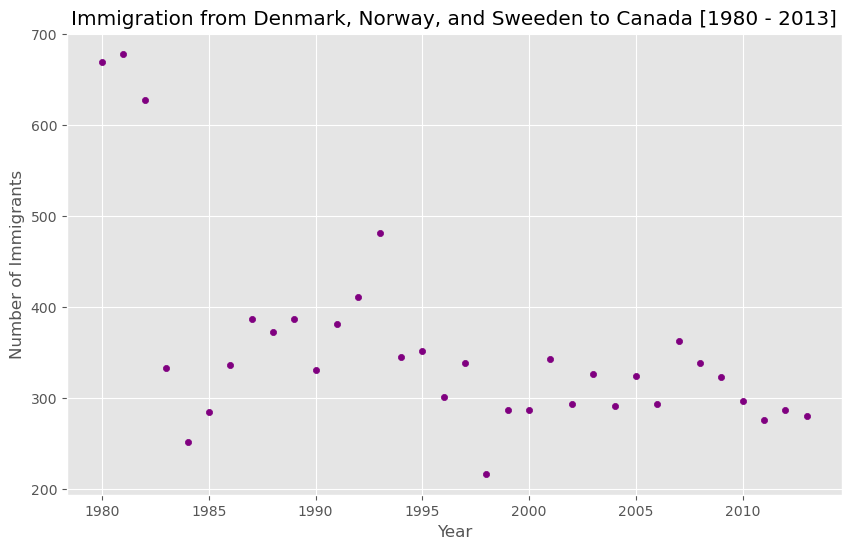

In [33]:
df_total.plot(kind = 'scatter',
              x = 'year', y = 'total',
              figsize = (10,6), color = 'purple')

plt.title('Immigration from Denmark, Norway, and Sweeden to Canada [1980 - 2013]')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()


# BUBBLE PLOTS

A bubble plot is a variation of the scatter plot that displays three dimensions of data (x,y,z). The data points are replaced with bubbles, and the size of the bubble is determined by the third variable `z`, also known as the weight. in `matplotlib`, we can pass in an array or scalar to the parameter `s` to `plot()`, that contains the weight of each point.



#####
Let's analyze the effect fo the crisis that occured in Argentina (i.e the great depression from 1998 to 2022), and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a `bubble plot` of immigration from Brazil and Argentina for the years 1980 -2013. We will set the weights for the bubble as the normalized value of the population for each year.

**Step 1**: Get the data for Brazil and Argentina. The `Years` will be set to type int and included in the dataframe.

In [34]:
# transposed dataframe
df_can_t = df_can[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# Label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace = True)

# view the changes
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


###### 
**Step 2**: Create the normalized weights

We  will use feature scaling to bring all the values into the range [0,1]. 


In [35]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min())/ (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min())/ (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())


###### 
**Step 3**: Plot the data
- To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing itn via the `ax` parameter.
- We will also pass in the weights using the `s` parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore, we will:
    - multiply weights by 2000 to scale it up on the graph, and,
    - add 10 t0 compensate for the min value (which has a 0 weight and therefore scale with x2000).


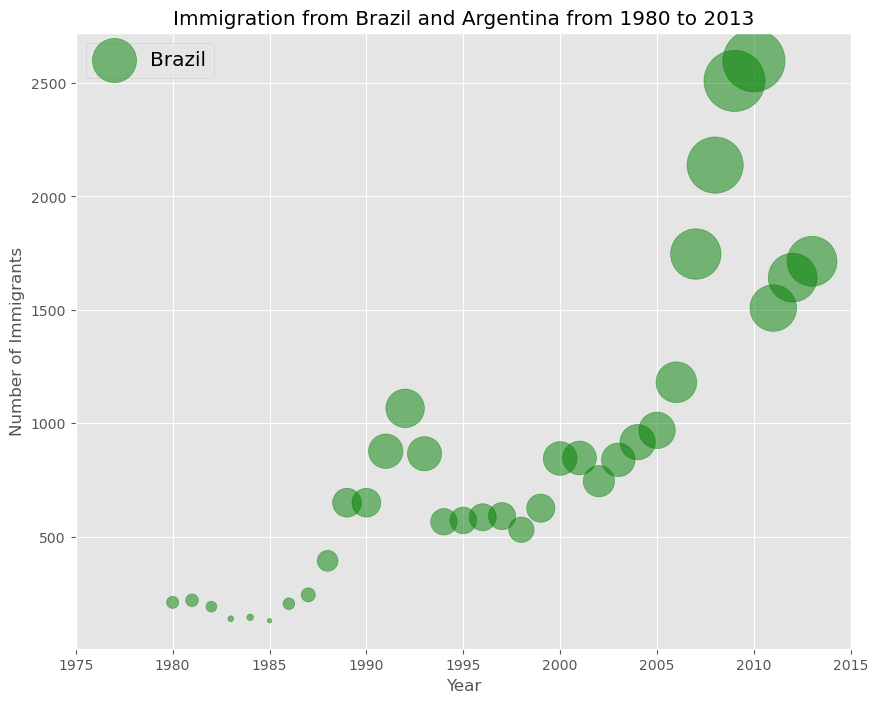

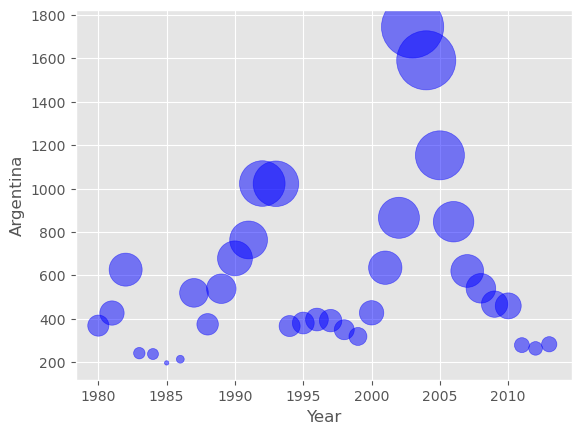

In [36]:
# Brazil
ax0 = df_can_t.plot(kind = 'scatter',
                    x = 'Year',
                    y = 'Brazil',
                    figsize = (10, 8),
                    alpha = 0.5, # transparency
                    color = 'green',
                    s=norm_brazil * 2000 + 10, # pass in weights
                    xlim = (1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind = 'scatter',
                    x='Year',
                    y='Argentina',
                    alpha = 0.5,
                    color = 'blue',
                    s=norm_argentina * 2000 + 10,
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc = 'upper left', fontsize = 'x-large')


###### 
From the plot above, we can see a corresponding increase in immigration from Argentin during the 19988 - 2002 great depression. We can observe a similar spike around 1985 to 1993. In fact, Argentina had suffered a great depression from 194 to 1990, just before the onset of 1998 - 2002 great depression.

On a similar note, Brazil suffered the Samba Effect where the Brazilian real (currency) dropped nearly 35% in 1999. There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. The Brazilian government subseuently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010. The  immigration data reflect these events.



###### 
Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. Use df_can_t that was defined earlier.

Step 1: Normalize the data pertaining to China and India

In [37]:
# normalized Chinese data
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

# normalized Indian data
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

###### 
Step 2: Generate the bubble plots.

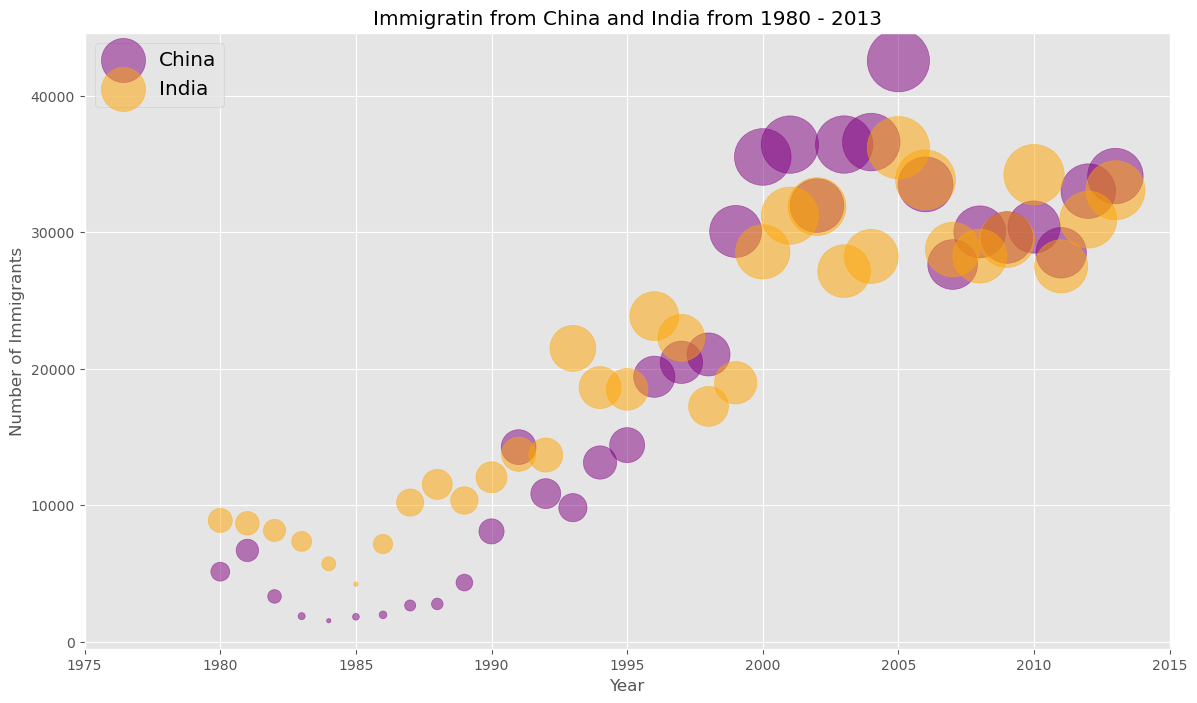

In [38]:
# China
ax0 = df_can_t.plot(kind = 'scatter',
                    x = 'Year',
                    y = 'China',
                    figsize = (14, 8),
                    alpha = 0.5, 
                    color = 'purple',
                    s = norm_china * 2000 + 10,
                    xlim = (1975, 2015)
                   )

ax1 = df_can_t.plot(kind = 'scatter',
                    x = 'Year',
                    y = 'India',
                    figsize = (14, 8),
                    alpha = 0.5, 
                    color = 'orange',
                    s = norm_india * 2000 + 10,
                #    xlim = (1975, 2015),
                    ax =ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigratin from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc = 'upper left', fontsize = 'x-large')